In [3]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
%matplotlib inline
from pandas.core import datetools

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')


In [4]:
read = pd.read_csv("C://Users//Tushar//Downloads//complete-fifa-2017-player-dataset-global//FullData - Copy.csv")
read1 = pd.read_csv("C://Users//Tushar//Downloads//complete-fifa-2017-player-dataset-global//FullData.csv")

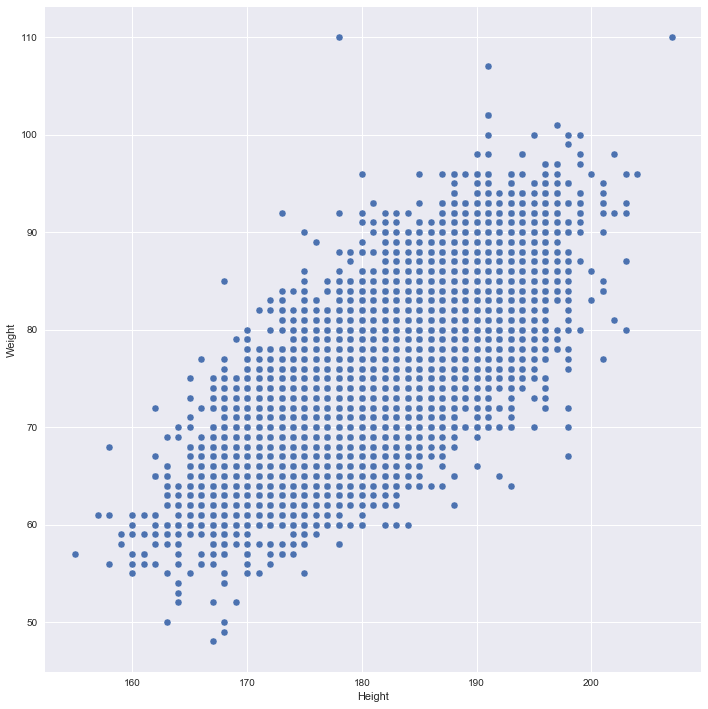

In [5]:
sns.pairplot(read , size = 10 , x_vars ="Height" , y_vars = "Weight" , dropna = True)

In [6]:
X = read.iloc[:, 10].values
Y = read.iloc[:, 11].values

In [7]:
#Splitting the dataset into Training Set and  Test Set
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20 , random_state = 0)
#print(len(Y_train))
#print(len(X_train))
#print(len(Y))
#print(len(X))
#print(X_train.shape)
#print(Y_train.shape)





In [8]:
#Fitting Simple Linear Regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
result = regressor.fit(X_train.reshape(len(X_train), 1), Y_train)


In [9]:
Y_predictor = regressor.predict(X_train.reshape(len(X_train), 1))
#Y_predictor = Y_predictor.reshape(len(X_train),1)
#print(Y_predictor)[0:5]
print(Y_predictor)

[ 73.60436547  75.95356761  79.86890451 ...,  79.08583713  71.25516333
  66.55675905]


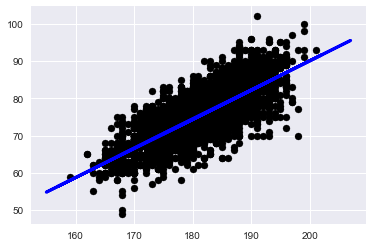

In [10]:
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_train, Y_predictor, color='blue', linewidth=3)

In [11]:
Y = read['Weight']
X = read[['Height']]
result = sm.OLS( Y, X ).fit()
result.pvalues
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.808e+06
Date:                Tue, 31 Oct 2017   Prob (F-statistic):               0.00
Time:                        14:03:22   Log-Likelihood:                -53693.
No. Observations:               17588   AIC:                         1.074e+05
Df Residuals:                   17587   BIC:                         1.074e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Height         0.4160      0.000   1951.448      0.000       0.416       0.416
==============================================================================
Omnibus:                      252.612   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.818
Skew:                           0.233   Prob(JB):                     2.89e-66
Kurtosis:                       3.442   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

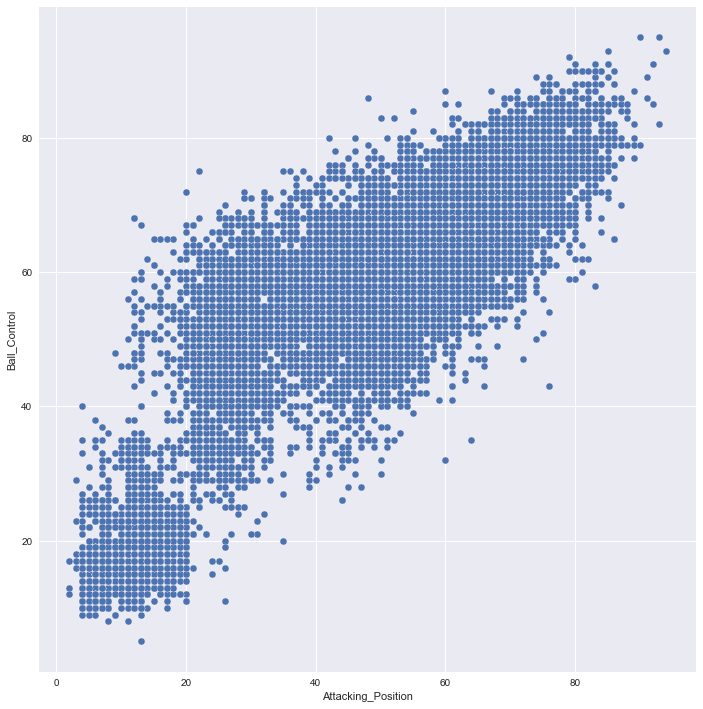

In [12]:
sns.pairplot(read , size = 10 , x_vars ="Attacking_Position" , y_vars = "Ball_Control" , dropna = True)

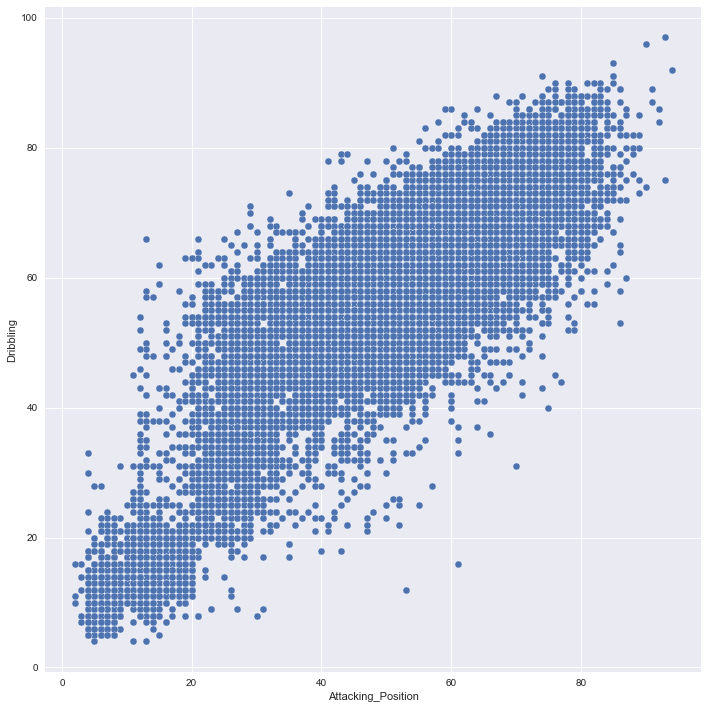

In [13]:
sns.pairplot(read , size = 10 , x_vars ="Attacking_Position" , y_vars = "Dribbling" , dropna = True)

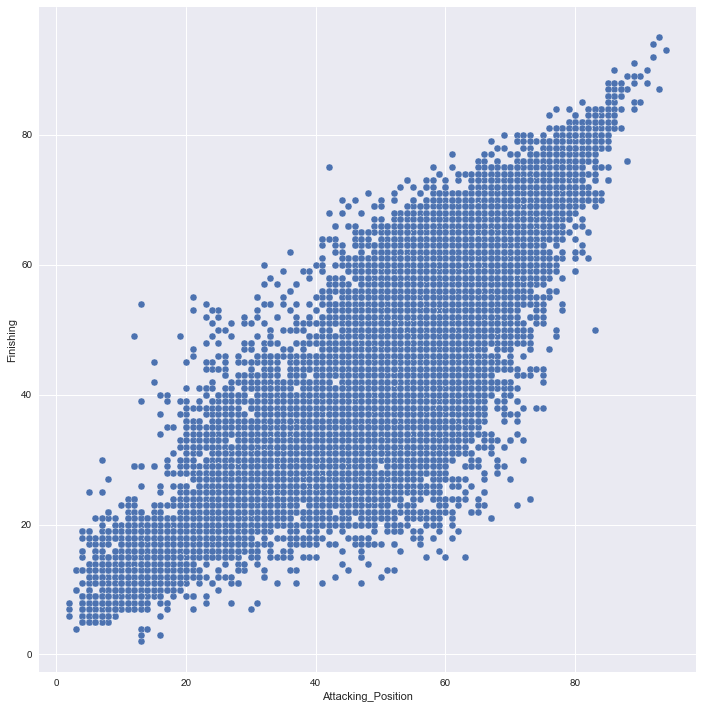

In [14]:
sns.pairplot(read , size = 10 , x_vars ="Attacking_Position" , y_vars = "Finishing" , dropna = True)

In [15]:
Y = read['Attacking_Position']
X = read[['Ball_Control','Dribbling','Finishing']]
result = sm.OLS( Y, X ).fit()
result.pvalues
result.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Attacking_Position   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 3.164e+05
Date:                Tue, 31 Oct 2017   Prob (F-statistic):               0.00
Time:                        14:03:34   Log-Likelihood:                -59634.
No. Observations:               17588   AIC:                         1.193e+05
Df Residuals:                   17585   BIC:                         1.193e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Ball_Control     0.1123      0.007     15.266      0.000       0.098       0.127
Dribbling        0.4092      0.008     48.721      0.000       0.393       0.426
Finishing        0.4609      0.005     94.838      0.000       0.451       0.470
==============================================================================
Omnibus:                      642.026   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1565.610
Skew:                          -0.189   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Is the relationship significant?
Yes the relation is significant as it is a linear relation between 'Attacking_Position' and 'Ball_Control','Dribbling','Finishing' of the the players so we can predict Attacking_Position from the other of the players with minimum error or variance. we can also check rsquare value.
Scatter plots shown above displays a linear relation between 'Ball_Control','Dribbling','Finishing' and Attacking_Position.

In [16]:
#Assigning X and Y axis o dependent and independent variables
X_actual = read[['Ball_Control','Dribbling','Finishing']].values
Y_actual = read.iloc[:, 26].values

* Are any model assumptions violated?
* These are the assumptions

* A linear relationship between outcome and predictor variables

Yes there is a linear relation between ourcome and predictor Variables as we can see from the scatter plots above.


* The error term has the following assumptions
* have mean zero; otherwise the forecasts will be systematically biased.
* statistical independence of the errors (in particular, no correlation between consecutive errors in the case of time series data).



* homoscedasticity (constant variance) of the errors.

as we can see in scatter plot their is homoscedasticity in errors.


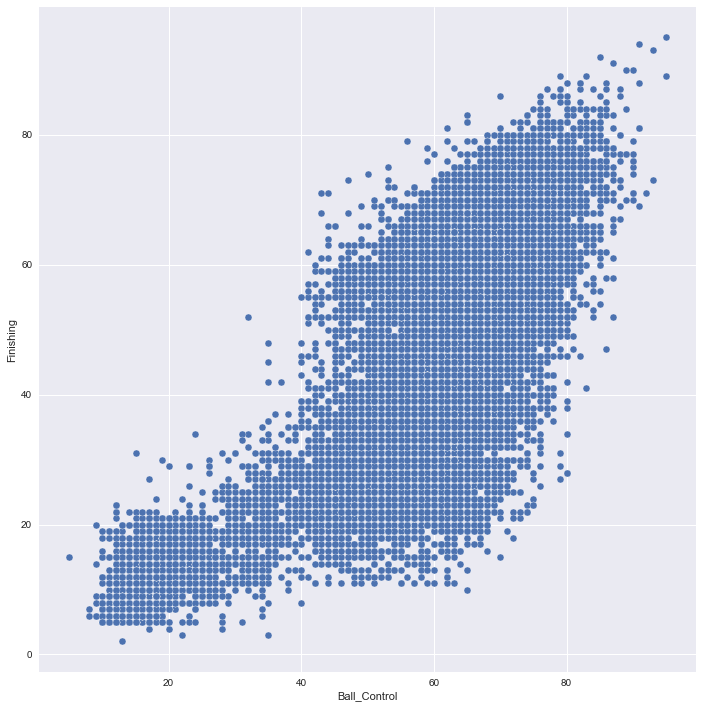

In [17]:
sns.pairplot(read , size = 10 , x_vars ="Ball_Control" , y_vars = "Finishing" , dropna = True)

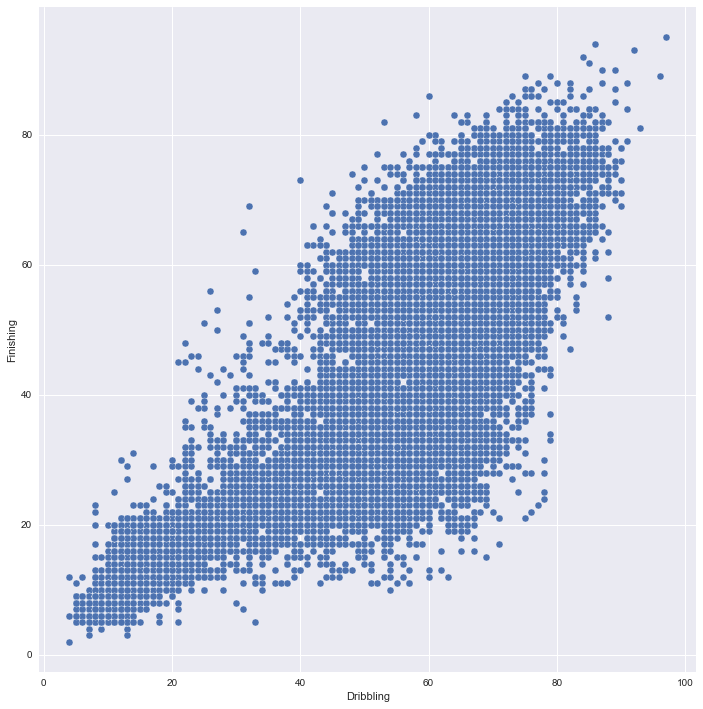

In [18]:
sns.pairplot(read , size = 10 , x_vars ="Dribbling" , y_vars = "Finishing" , dropna = True)

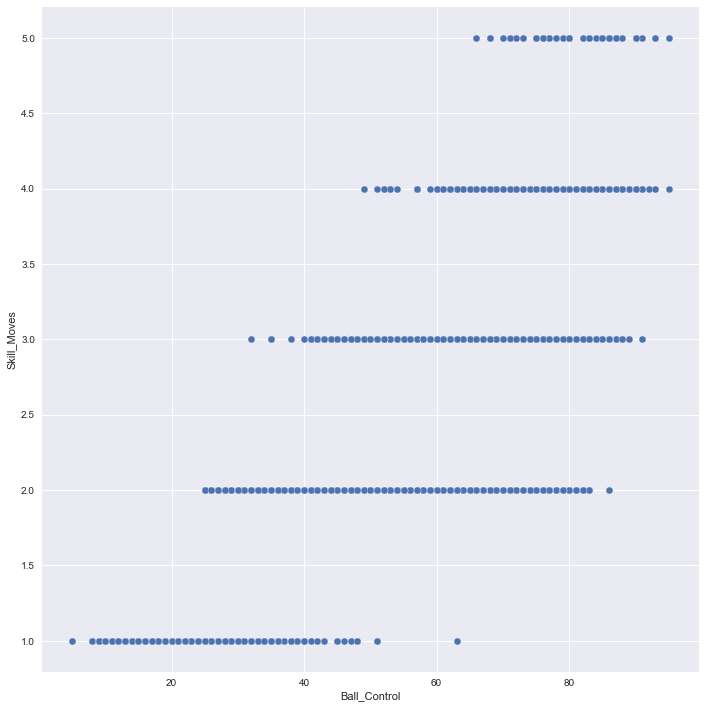

In [19]:
sns.pairplot(read , size = 10 , x_vars ="Ball_Control" , y_vars = "Skill_Moves" , dropna = True)

In [20]:
read.Skill_Moves = read.Skill_Moves.replace({1:0,2:0,3:1,4:1,5:1})

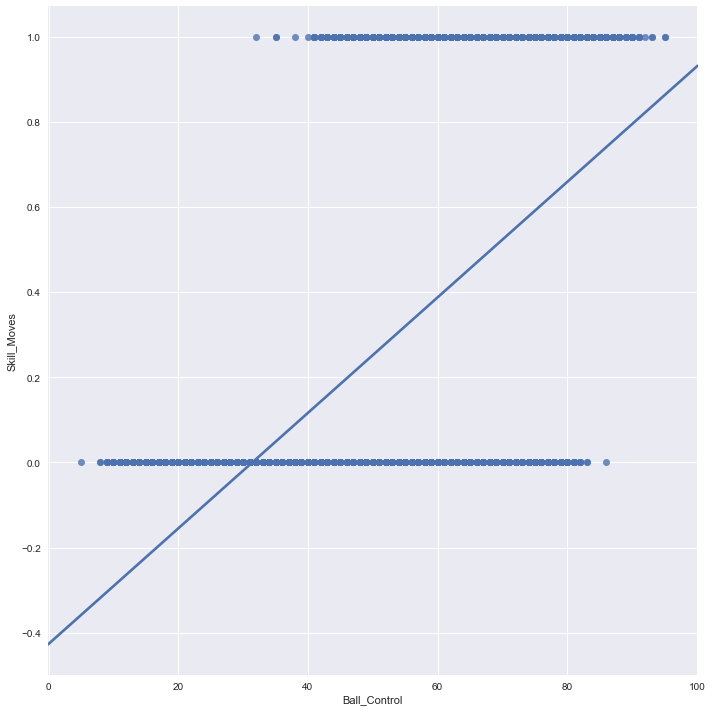

In [21]:
sns.lmplot(size = 10 , x ="Ball_Control" , y = "Skill_Moves" , data= read, ci= None)

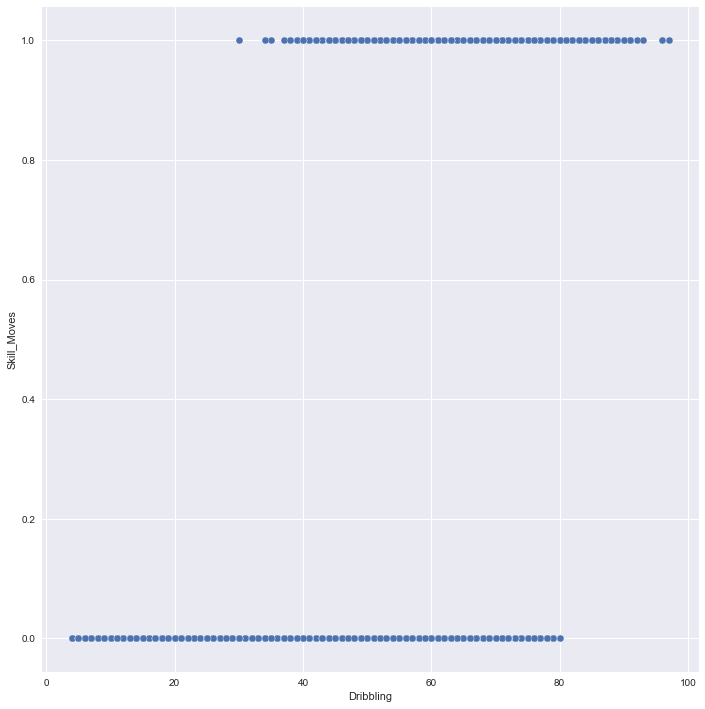

In [22]:
sns.pairplot(read , size = 10 , x_vars ="Dribbling" , y_vars = "Skill_Moves" , dropna = True)

* Is there any multi-colinearity in the model?
There are three predictor variables in this multiple regression model. from which the scatter plot between "Ball_Control" vs "Finishing" and "Dribbling" vs "Finishing" seems to be a very fuzzy linear correlation. But scatter plot between "Ball_Control" vs "Dribbling" shows a good considerable linear correlation. So yes multi-colinearity exist in the model.

* In the multivariate models are predictor variables independent of all the other predictor variables?
now as we can see the scatter plot between "Ball_Control" vs "Dribbling" shows a good considerable linear correlation. we can only say that not all other predictor variables are dependent on all other predictor variables.

In [23]:
#Splitting the dataset into Training Set and Test Set.
from sklearn.cross_validation import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_actual, Y_actual, test_size = .20 , random_state = 0)
print(X_train1)

[[56 58 33]
 [56 45 40]
 [18  8  9]
 ..., 
 [ 5 15 15]
 [70 76 60]
 [73 76 72]]


* Does the model make sense?
Yes the model totally makes sense as the Y_predictor1 will predict all the values with an R-squared: 0.982 and the other predictor variables.

In [24]:
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import confusion_matrix

regressor = LinearRegression()
regressor.fit(X_train1, Y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
Y_predictor1 = regressor.predict(X_test1)
#print(X_test1)
print(Y_predictor1)


[  9.34537466  36.02983268  49.58051512 ...,   9.48081954  15.45053297
  38.20606635]


In [26]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(Y_actual, Y_predictor1))

ValueError: Found input variables with inconsistent numbers of samples: [17588, 3518]

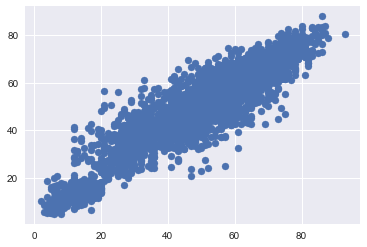

In [27]:
plt.scatter(Y_test1, Y_predictor1)

In [28]:
print (regressor.intercept_)
print (regressor.coef_)

-1.95231849927
[ 0.16014706  0.39626245  0.45538084]


In [29]:
np.median(Y_test1)

54.0

In [30]:
y_m=np.mean(Y_test1)

In [31]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(Y_test1, Y_predictor1))
rmse

7.2524954890791093

In [32]:
rmse/y_m

0.14714796028986521

* Does regularization help? 
Regularization did not helped, as it is used to find how correct your model is working and how well it is predicting values from the trained variables. Using its features like RMSE and y_test mean it is used to show a valid out but predicting the dependent correctly. RSME did not change at all after regularization.

* Does the model makes sense ?
Yes the model totally makes sense as it will predict the "Attacking_position" with a least error and then it is comapred to mean of Y_Test its 

Part 2: Find a significant logistic linear model of your choosing in your data. Create a logistic linear model. (25 points)
Answer the following questions for the multivariate linear model:

In [33]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn import metrics

In [34]:
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train1,Y_train1)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [36]:
y_pred = ridge.predict(X_test1)


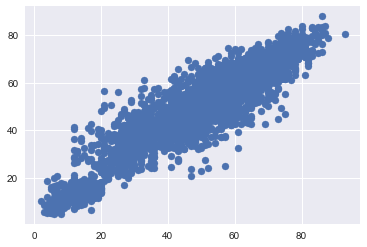

In [37]:
plt.scatter(Y_test1, y_pred)

In [38]:
rmse = np.sqrt(metrics.mean_squared_error(Y_test1, y_pred))
rmse

7.2524954917888715

--------------------------------------------------------------------------------------------------------------------
Answer the following questions for the logistic linear model:
* Is the relationship significant?
* Are any model assumptions violated?  
* Cross validate the model. How well did it do?


In [39]:
X_actual = read[['Ball_Control','Dribbling']].values
Y_actual = read[['Skill_Moves']].values

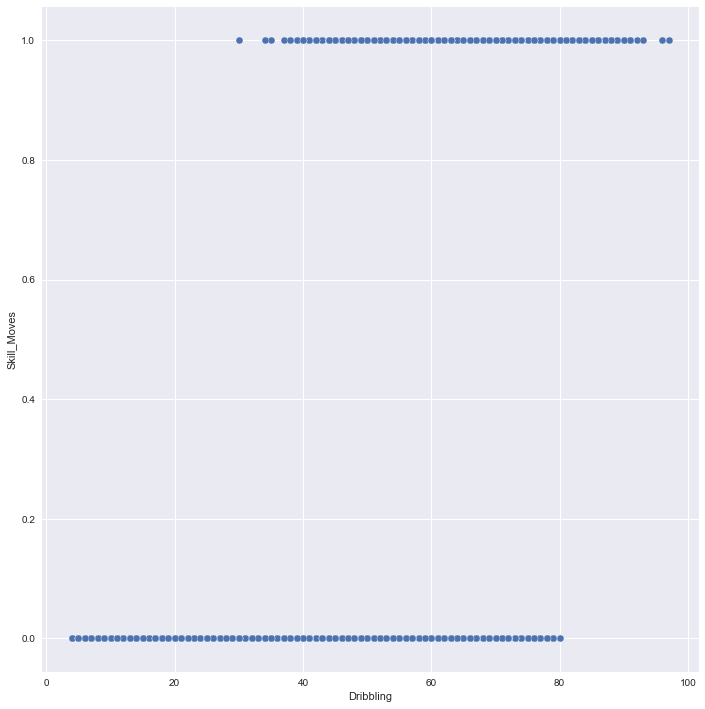

In [40]:
sns.pairplot(read , size = 10 , x_vars ="Dribbling" , y_vars = "Skill_Moves" , dropna = True)

In [41]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_actual, Y_actual, random_state=0)

In [42]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train2,y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
log.score(X_test2,y_test2)

0.79258585399135772

Accuracy of logistic regression classifier on test set: 0.792

In [44]:
y_predictor2 = log.predict(X_test2)

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix = confusion_matrix(y_test2,y_predictor2)
print(confusion_matrix)

[[2397  427]
 [ 485 1088]]


In [47]:
y_mean = np.mean(y_test2)
print(y_mean)

0.357743916307


In [48]:
rmse = np.sqrt(metrics.mean_squared_error(y_test2, y_predictor2))
print(rmse)

0.455427432209


In [49]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold, cross_val_score, train_test_split

In [50]:
# RMSE using 5-fold cross-validation
kf = KFold(len(X_actual), n_folds=5)

In [51]:
for train,test in kf:
    print (train)
    print (test)

[ 3518  3519  3520 ..., 17585 17586 17587]
[   0    1    2 ..., 3515 3516 3517]
[    0     1     2 ..., 17585 17586 17587]
[3518 3519 3520 ..., 7033 7034 7035]
[    0     1     2 ..., 17585 17586 17587]
[ 7036  7037  7038 ..., 10551 10552 10553]
[    0     1     2 ..., 17585 17586 17587]
[10554 10555 10556 ..., 14068 14069 14070]
[    0     1     2 ..., 14068 14069 14070]
[14071 14072 14073 ..., 17585 17586 17587]


The result is telling us that we have 2397+427 correct predictions and 485+1088 incorrect predictions.

In [52]:
scores = []
for train, test in kf:
    log.fit(X_actual[train],Y_actual[train])
    scores.append(np.sqrt(metrics.mean_squared_error(Y_actual[test], log.predict(X_actual[test]))))
scores

[0.45050663161369064,
 0.45050663161369064,
 0.47026415955421053,
 0.48462279666449348,
 0.44261224719250541]

In [53]:
def show_stats(m, ncv, cv):
  print('Method: %s' %m)
  print('RMSE on no CV training: %.3f' %ncv)
  print('RMSE on 5-fold CV: %.3f' %cv)

In [54]:
show_stats('Simple Linear Regression',rmse ,np.mean(scores))

Method: Simple Linear Regression
RMSE on no CV training: 0.455
RMSE on 5-fold CV: 0.460


* Is the relationship significant?
yes the relationship is significant as the score is coming out to be and accuracy is coming out to be 80%. and the relation ship between 'Skill_Moves' and 'Ball_Control','Dribbling' is plotted.

* Are any model assumptions violated?  
There are no assumption in the model apart from linear relation between Skills and ither independent variables.

* Cross validate the model. How well did it do ?
K-fold cross validation has been performed with 5 folds and then rmse has been calculated. Now we can see rmse before and after
the cross validation which is increased.
